In [1]:
from qiskit import*
from qiskit.tools.visualization import plot_histogram

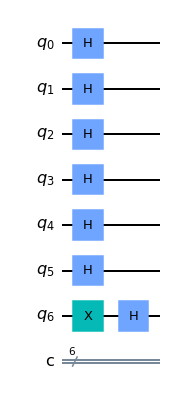

In [2]:
n=6
qc=QuantumCircuit(n+1,n)
qc.x(n)
for i in range(0,n):
    qc.h(i)
qc.h(n)
qc.draw(output='mpl')

In [3]:
S='110101'
S=S[::-1]#reverse s to fit qiskit's qubit ordering
print(S)

101011


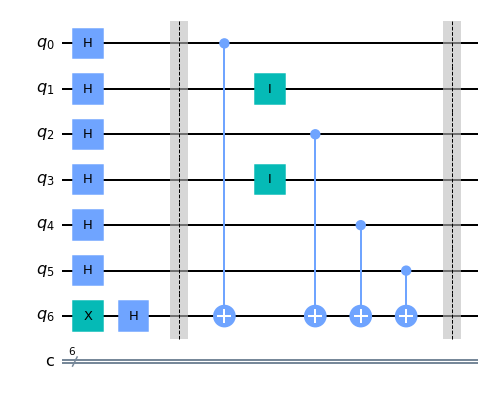

In [4]:
#creating the oracle

qc.barrier()
for i in range(n):
    if S[i]=='0':
        qc.i(i)
    else:
        qc.cx(i,n)
qc.barrier()
qc.draw(output='mpl')

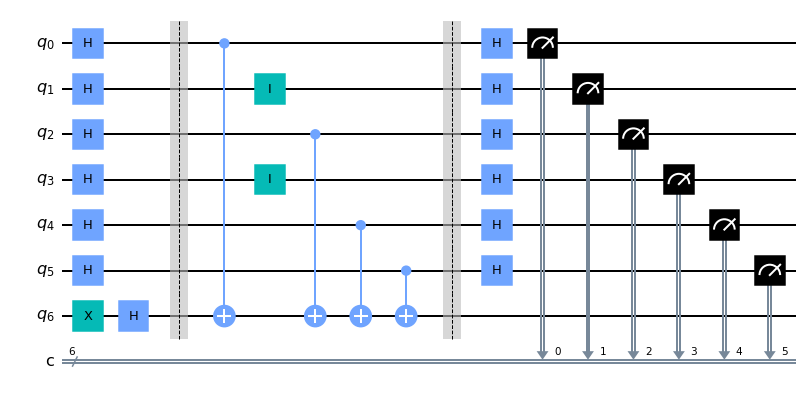

In [5]:
for i in range(n):
    qc.h(i)
    qc.measure(i,i)
qc.draw(output='mpl')

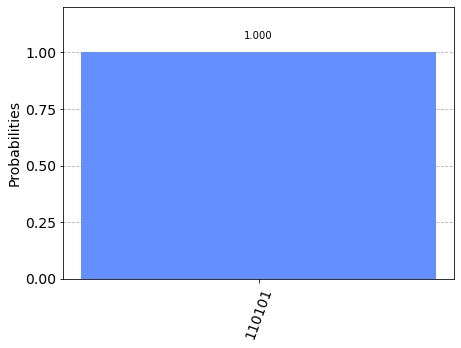

In [6]:
#simulated answer using qasm simulator

Backend=BasicAer.get_backend('qasm_simulator')
Shots=1024
result=execute(qc,Backend,shots=Shots).result().get_counts()
plot_histogram(result)

In [ ]:
IBMQ.load_account()
provider=IBMQ.get_provider(hub='ibm-q')
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits <= 15 and
                                   x.configuration().n_qubits >= 6 and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

In [ ]:
from qiskit.tools.monitor import job_monitor
job=execute(qc,backend,shots=1024)
job_monitor(job,interval=2)

In [ ]:
results = job.result()
answer = results.get_counts()
plot_histogram(answer)